Library

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from tabulate import tabulate

Upload Dataset

In [29]:
url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/01.%20Machine%20Learning/01.%20Week%201/Dataset/Automobile.csv"
df = pd.read_csv(url)
df

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses,symboling
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN,1
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0,2
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,28,23,5400.0,114.0,9.5,3.15,3.78,mpfi,141,...,109.1,front,rwd,sedan,4.0,std,gas,volvo,95.0,-1
201,19045.0,25,19,5300.0,160.0,8.7,3.15,3.78,mpfi,141,...,109.1,front,rwd,sedan,4.0,turbo,gas,volvo,95.0,-1
202,21485.0,23,18,5500.0,134.0,8.8,2.87,3.58,mpfi,173,...,109.1,front,rwd,sedan,4.0,std,gas,volvo,95.0,-1
203,22470.0,27,26,4800.0,106.0,23.0,3.40,3.01,idi,145,...,109.1,front,rwd,sedan,4.0,turbo,diesel,volvo,95.0,-1


Preprocessing

In [36]:
# Menghapus baris dengan nilai yang hilang
df.dropna(inplace=True)

# Mengubah variabel kategori menjadi numerik
df = pd.get_dummies(df, drop_first=True)

# Memisahkan fitur dan target
X = df.drop('symboling', axis=1)
y = df['symboling']

In [38]:
X = pd.get_dummies(X, drop_first=True)

In [43]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Ukuran set pelatihan: {X_train.shape[0]} baris")
print(f"Ukuran set pengujian: {X_test.shape[0]} baris")

Ukuran set pelatihan: 127 baris
Ukuran set pengujian: 32 baris


In [48]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)

# Menghitung MSE, RMSE, RSquared
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [50]:
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error (MSE): 0.67
Root Mean Squared Error (RMSE): 0.82
R-squared (R²): 0.55


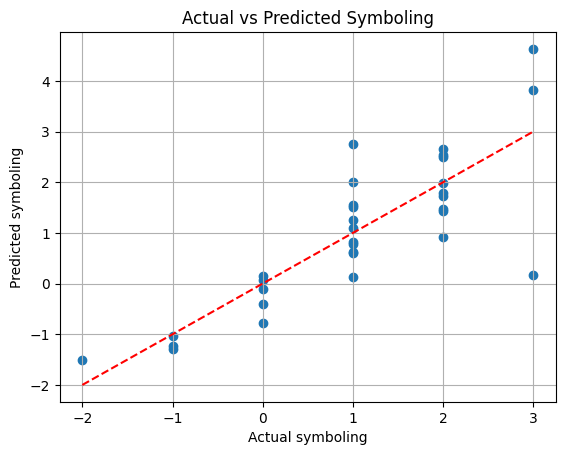

In [53]:
# Visualisasi
plt.scatter(y_test, y_pred)
plt.xlabel("Actual symboling")
plt.ylabel("Predicted symboling")
plt.title("Actual vs Predicted Symboling")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid()
plt.show()

Rumus Matematika yang digunakan:

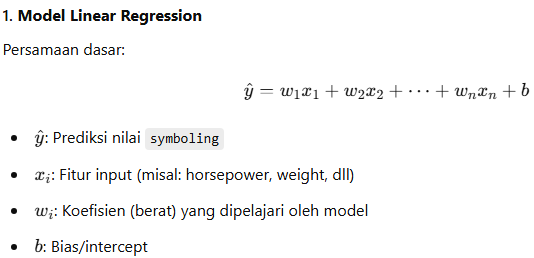

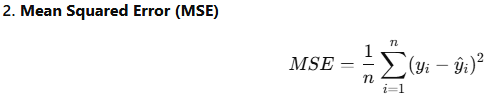

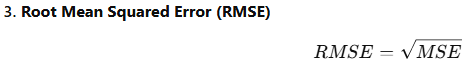

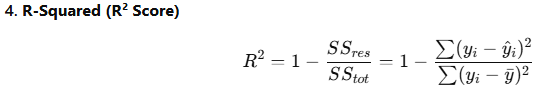